# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# Create two new dataframes
north_df = pd.read_csv("./NorthCallCenter.csv", encoding='latin-1')
south_df = pd.read_csv("./SouthCallCenter.csv", encoding='latin-1')

north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [48]:
# EDA Question 1A solution below:
Reps = north_df[north_df["Rep ID"].notnull()]["Rep ID"].unique()
print(Reps.size)

# 9 Reps

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [47]:
# EDA Question 1B solution Below:
Reps = south_df[south_df["Rep ID"].notnull()]["Rep ID"].unique()
print(Reps.size)

# 11 Reps

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
# EDA Question 2A solution Below:
print("Busy Minutes: " + str(north_df["Busy Minutes"].mean()))
print("Not Ready Minutes: " + str(north_df["Not Ready Minutes"].mean()))
print("Incoming Wait Time: " + str(north_df["Incoming Wait Time"].mean()))
print("During Call Wait Time: " + str(north_df["During Call Wait Time"].mean()))

Busy Minutes: 9.987755102040817
Not Ready Minutes: 1.9142857142857144
Incoming Wait Time: 3.048780487804878
During Call Wait Time: 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
# EDA Question 2B solution Below:
print("Busy Minutes: " + str(south_df["Busy Minutes"].mean()))
print("Not Ready Minutes: " + str(south_df["Not Ready Minutes"].mean()))
print("Incoming Wait Time: " + str(south_df["Incoming Wait Time"].mean()))
print("During Call Wait Time: " + str(south_df["During Call Wait Time"].mean()))


Busy Minutes: 10.054140127388536
Not Ready Minutes: 1.910828025477707
Incoming Wait Time: 3.0
During Call Wait Time: 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# EDA Question 3 solution Below:
timeBlockN = list(north_df[north_df["Time Block"].notnull()]["Time Block"])
timeBlockS = list(south_df[south_df["Time Block"].notnull()]["Time Block"])
timeBlockAll = timeBlockN + timeBlockS
timeBlocks = pd.DataFrame(timeBlockAll)
timeBlocks = list(timeBlocks[0].unique())

callsPerTimeBlock = []
for i in timeBlocks:
	callsN = (north_df[north_df["Time Block"] == i]["Calls"].sum())
	callsS = (south_df[south_df["Time Block"] == i]["Calls"].sum())
	callsAll = (str(i) + ": " + str(callsS + callsN))
	callsPerTimeBlock.append(callsAll)
	
print(callsPerTimeBlock)

['9:00 AM: 10', '11:00 AM: 56', '4:00 PM: 53', '12:00 PM: 120', '2:00 PM: 65', '3:00 PM: 73', '1:00 PM: 40', '10:00 AM: 99', '5:00 PM: 43']


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 245
- 1b) Reps in the South Branch = 314


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.96
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [8]:
# Question 1 solution below
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print("\n")

for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: The only missing data here is within the "Incoming Wait Time" column. I would keep this column because it is still relevant to the business questions, and because it can be assumed that the missing data is due to instances where there was no incoming wait time.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [9]:
# Cleaning Question 2 solution below:
north_df["Sale"] = north_df["Sale"].str.strip()
north_df["Sale"].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: The separate "YES" value simply had whitespace trailing off the end. I stripped that.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [10]:
# Cleaning Question 3 solution below:
for col in north_df.columns:
    dupes = (north_df[col].duplicated())
    print(str(col) + ": " + str(dupes.unique()))

Unnamed: 0: [False]
Branch: [False  True]
Call Purpose: [False  True]
Time Block: [False  True]
Incoming or Outgoing: [False  True]
Queue: [False  True]
Rep ID: [False  True]
Sale: [False  True]
Lost Call: [False  True]
Abandoned: [False  True]
Busy Minutes: [False  True]
Not Ready Minutes: [False  True]
Incoming Wait Time: [False  True]
During Call Wait Time: [False  True]
Calls: [False  True]


##### Record your answer below:
> Your Answer: Yes, nearly every column in either data set contains duplicate values. This is expected, as none of the column data in either dataset contains exclusive values. The dataset does not need to be cleaned for this.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [11]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: I had perviously thought the only needless column was the branch column, but the question after this makes it relevant for sorting by branch in the combined dataset. For the moment, all columns are relevant and clean data.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [12]:
# Create dataframe for the entire company named df
dframes = [north_df, south_df]
df = pd.concat(dframes)



#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [13]:
# Manipulation Question solution below:
repCalls = df.groupby(["Rep ID" ,"Branch"])["Calls"].sum()
repCalls.sort_values(ascending=False)

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
George  South     29
Kate    South     29
Todd    North     29
Duke    North     29
Karl    South     28
Joe     North     26
Susan   South     26
Josh    South     26
Sharon  South     25
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Alice   South     20
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 Calls.
- South Branch = Eric, 35 Calls.

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [14]:
# Manipulation Question 2 solution below:
branchAbandonedDf = df.groupby(["Branch"])["Abandoned"].mean()
abandonedDf = df["Abandoned"].mean()
print("Company Wide " + str(abandonedDf * 100))
print(branchAbandonedDf * 100)

Company Wide 1.9677996422182469
Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide = 1.96
- Do any of these fall out of the optimal range of 2-5%?
> No they do not.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [36]:
# Manipulation Question 3 solution below:

waitsBranch = df.groupby(["Branch"])["Incoming Wait Time"].count()
waitsAcross = df["Incoming Wait Time"].count()
waitAboveTwoDf = df[df["Incoming Wait Time"] <= 2]
waitDf = waitAboveTwoDf["Incoming Wait Time"].count()
waitsAbovePerBranch = waitAboveTwoDf.groupby(["Branch"])["Incoming Wait Time"].count()
waitDfFull = pd.Series({'Company Wide': waitDf})
waitAcrossFull = pd.Series ({'Company Wide': waitsAcross})
waitAllDf = pd.concat([waitDfFull, waitsAbovePerBranch])
waitAcrossDf = pd.concat([waitAcrossFull, waitsBranch])

print(waitAllDf)
C = (waitAllDf / waitAcrossDf) * 100
print(C)

Company Wide    81
North           33
South           48
dtype: int64
Company Wide    38.942308
North           40.243902
South           38.095238
dtype: float64


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 Calls
- South Branch = 38.09%, 48 Calls
- Company Wide = 38.94%, 81 Calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [154]:
# Manipulation Question 4 solution below:

answerPerBranch = df.groupby(["Branch"])["During Call Wait Time"].mean()
answerAcross = pd.Series({"Company Wide": df["During Call Wait Time"].mean()})
answerFull = pd.concat([answerPerBranch, answerAcross])
print(answerFull)


North           2.967347
South           3.076433
Company Wide    3.028623
dtype: float64


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 2.96 Seconds
- South Branch in seconds = 3.07 Seconds
- Company Wide in seconds = 3.02 Seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

{'A': np.float64(4.166666666666666), 'B': np.float64(2.013422818791946), 'C': np.float64(0.7246376811594203), 'D': np.float64(1.7045454545454544)}


C:\Users\Vicar\AppData\Local\Temp\ipykernel_28360\3398146062.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100


Text(0, 0.5, 'Abandonment Rate by %')

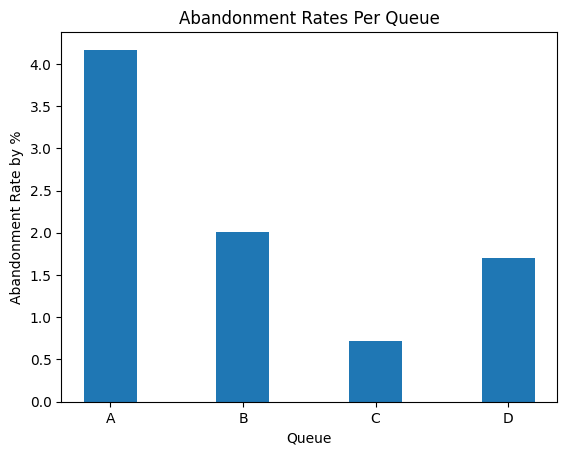

In [167]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100

#Your code below:

print(abandonment_rates)

plt.bar(list(abandonment_rates.keys()), abandonment_rates.values(), width=.4)

plt.title("Abandonment Rates Per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate by %")




##### Record your answer below:

> Chart style you chose and why: Bar Chart, since we are comparing 4 values associated with a consistent single index.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

<Axes: xlabel='Rep ID'>

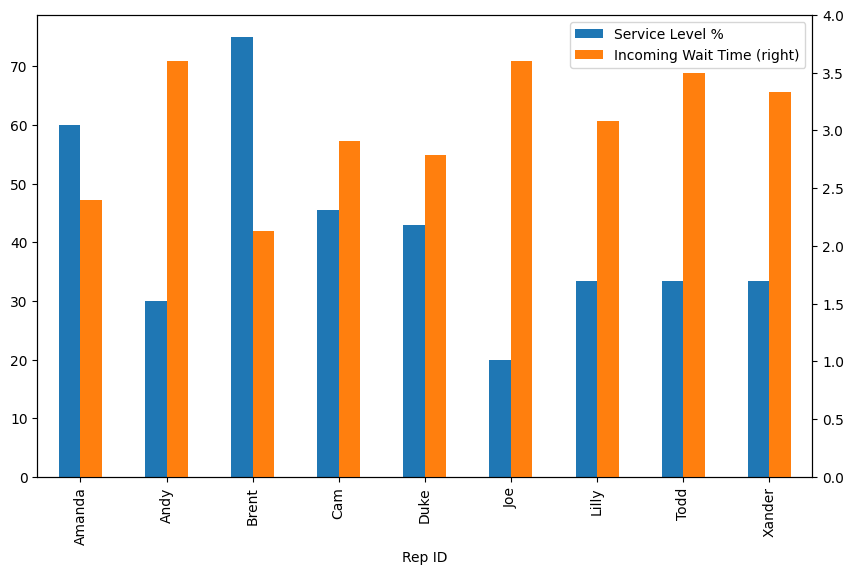

In [198]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

serviceLevelSpeed = pd.concat([service_level["Service Level %"], north_plt.set_index("Rep ID")], axis=1)
serviceLevelSpeed.plot.bar(secondary_y=["Incoming Wait Time"], figsize=(10, 6), ylim=(0, 4))


##### Record your answer below:

> Chart style you chose and why: Grouped bar chart. Same reasoning as before but with 2 sets of data.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


Text(0.5, 1.0, 'Incoming and Outgoing calls per Call Purpose')

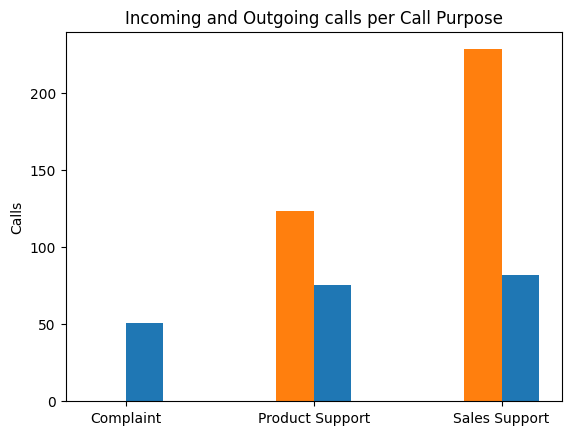

In [232]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
incomingAll = [complaints.get("Incoming", 0), sales_support.get("Incoming", 0), product_support.get("Incoming", 0)]
outgoingAll = [complaints.get("Outgoing", 0), sales_support.get("Outgoing", 0), product_support.get("Outgoing", 0)]

x = np.arange(len(call_purpose))
width = 0.2

plt.bar(x + width/2, incomingAll, width, label="Incoming")
plt.bar(x - width/2, outgoingAll, width, label="Outgoing")
plt.xticks(x, call_purpose)
plt.ylabel("Calls")
plt.title("Incoming and Outgoing calls per Call Purpose")


##### Record your answer below:

> Chart style you chose and why: Once again a grouped barplot, as here we are comparing 2 sets of values on the same scale.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: North Branch. The North Branch has the higher service rate, at a near exact speed level to that of South Branch. The differences are minimal however, and South Branch does have a lower abandonment rate.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: North Branch. The North Branch has fewer employees and a higher abandonment rate. They would therefore benefit more from employee growth.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Having information such as complaint reasoning could help determine outliers such as a caller disconnecting because of a factor other than long call wait times.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined